## EDA - Проект по очистке данных

Цель проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Задачи:
1. Первичная обработка данных
2. Обработка числовых столбцов
3. Обработка номинативных стоблцов
4. Преобразование данных
5. Корреляционный анализ
6. Анализ номинативных переменных
7. Выводы и финальный датафрейм

### Import modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind, f_oneway

### Function block

In [2]:
'''Function to calculate IQR and 25, 75 quantile'''


def perc_iqr(col):
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    iqr = perc75 - perc25
    print(
        'First quantile: {},'.format(perc25),
        'Third quantile: {},'.format(perc75),
        "IQR: {}, ".format(iqr),
        "Outliers: [{f}, {l}].".format(f=perc25 - 1.5*iqr, l=perc75 + 1.5*iqr))
    return (perc25 - 1.5*iqr, perc75 + 1.5*iqr, perc25, perc75)

In [3]:
'''Function for boxplot to score'''


def get_boxplot(col, df_1, df_2, df_3):
    fig, ax = plt.subplots(1, 3, figsize=(16, 2))
    sns.boxplot(x=col, y='score', data=df_1, ax=ax[0])
    ax[0].set_title('Boxplot for ' + col)
    ax[0].tick_params(axis='x', rotation=45)
    sns.boxplot(x=col, y='score', data=df_2, ax=ax[1])
    ax[1].set_title('Boxplot for ' + col)
    ax[1].tick_params(axis='x', rotation=45)
    sns.boxplot(x=col, y='score', data=df_3, ax=ax[2])
    ax[2].set_title('Boxplot for ' + col)
    ax[2].tick_params(axis='x', rotation=45)
    plt.show()

In [1]:
'''Function for heatmap of correlations'''


def get_corr_heatmap(df, header):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title(header, fontdict={'fontsize': 18}, pad=12)
    plt.show()

In [5]:
'''Check valid sample size function (good sample size not less then 20)'''


def check_sample(col, df):
    valid_list = []
    cols = df.dropna()[col].unique()
    for item in cols:
        if len(df[df[col] == item]['score']) >= 20:
            valid_list.append(item)
    return valid_list

In [6]:
'''TTest function'''


def get_stat_dif(col_list, df):
    for col in col_list:
        cols = check_sample(col, df)
        if len(cols) >= 2:
            combinations_all = list(combinations(cols, 2))
            for comb in combinations_all:
                if ttest_ind(df[df[col] == comb[0]]['score'], df[df[col] == comb[1]]['score']).pvalue <= 0.05/len(combinations_all):
                    print(
                        'Найдены статистически значимые различия Ttest для колонки', col)
                    break
        else:
            print('Not enough samples for', col)

In [7]:
'''ANOVA test function'''


def get_stat_anova(col_list, df):
    for col in col_list:
        cols = check_sample(col, df)
        if len(cols) >= 2:
            var_list = []
            for item in cols:
                var_list.append(list(df[df[col] == item]['score']))
            if f_oneway(*var_list).pvalue <= 0.05:
                print('Найдены статистически значимые различия ANOVA для колонки', col)
        else:
            print('Not enough samples for', col)

### Basic Setup (reading csv, settings)

In [40]:
data = pd.read_csv('stud_math.csv')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

sns.set()

display(data.head(10))
display(data.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

## Let's see empty cells

Посмотрим на количество пропусков. Они есть и по некоторым столбцам их число превышает 10%. Но в среднем число пропусков не большое. Целевой столбец (score) имеет всего 6. Далее я решу, что с ними делать...

In [41]:
display(data.isnull().sum())

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

## initializing variables

In [ ]:
cat_list = ['sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob',
            'reason', 'guardian', 'traveltime', 'studytime', 'failures',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

valid_dict_str = {'school': ['GP', 'MS'], 'sex': ['F', 'M'], 'address': ['U', 'R'], 'famsize': ['GT3', 'LE3'],
                  'pstatus': ['A', 'T'], 'mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
                  'fjob': ['teacher', 'health', 'services', 'at_home', 'other'],
                  'reason': ['home', 'reputation', 'course', 'other'], 'guardian': ['mother', 'father', 'other'],
                  'schoolsup': ['yes', 'no'], 'famsup': ['yes', 'no'], 'paid': ['yes', 'no'], 'activities': ['yes', 'no'],
                  'nursery': ['yes', 'no'], 'higher': ['yes', 'no'], 'internet': ['yes', 'no'], 'romantic': ['yes', 'no']}

valid_dict_num = {'medu': [0.0, 4.0], 'fedu': [0.0, 4.0], 'traveltime': [1.0, 4.0],
                  'studytime': [1.0, 4.0], 'failures': [0.0, 4.0], 'famrel': [1.0, 5.0],
                  'freetime': [1.0, 5.0], 'goout': [1.0, 5.0], 'health': [1.0, 5.0]}

num_to_str_dict = {'medu': {0.0: 'no', 1.0: '1-4 grades', 2.0: '5-9 grades', 3.0: 'special or 11 grades', 4.0: 'high'},
                   'fedu': {0.0: 'no', 1.0: '1-4 grades', 2.0: '5-9 grades', 3.0: 'special or 11 grades', 4.0: 'high'},
                   'traveltime': {1.0: '< 15 min', 2.0: '15-30 min', 3.0: '5-10 houres', 4.0: '> 10 houres'},
                   'studytime': {1.0: '< 2 houres', 2.0: '2-5 houes', 3.0: '5-10 houres', 4.0: '> 10 houres'},
                   'famrel': {1.0: 'very few', 2.0: 'few', 3.0: 'several', 4.0: 'many', 5.0: 'too many'},
                   'health': {1.0: 'very few', 2.0: 'few', 3.0: 'several', 4.0: 'many', 5.0: 'too many'},
                   'freetime': {1.0: 'very bad', 2.0: 'bad', 3.0: 'average', 4.0: 'good', 5.0: 'veru good'},
                   'goout': {1.0: 'very bad', 2.0: 'bad', 3.0: 'average', 4.0: 'good', 5.0: 'veru good'}
                   }

### Basic treatment

In [9]:
# Deleting non-described column
data.drop(['studytime, granular'], inplace=True, axis=1)

In [10]:
# Lower columns names
data.columns = data.columns.str.lower()

### score column

Рассмотрим колонку Score. Для нас она является наиболее важной, так как наша модель будет учиться предсказывать именно этот параметр.

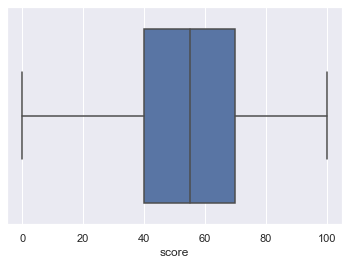

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [11]:
sns.boxplot(x=data['score'])
plt.show()
display(data['score'].describe())

In [12]:
# Clearing Score column
data.dropna(subset=['score'], inplace=True)
data = data[(data['score'] > 0) & (
    data['score'] <= 100)].reset_index(drop=True)

Я удалил строки с пустыми значениями, как строки по которым невозможно провести анализ.
Также я удалил строки со значениями равными нулю и больше 100, так как принял их за некорректный ввод. 
В дальнейшем, можно исследовать, каким способом получены эти данные и попробовать аналитически заменить их на валидные значения.

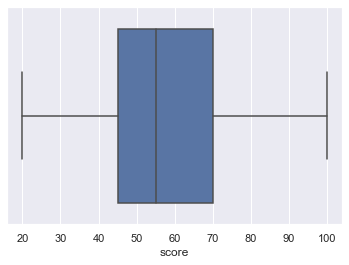

In [13]:
# Boxplot after treatment (clearing empty and 0 data)
sns.boxplot(x=data['score'])
plt.show()

### age column

Посмотрим на распределение возрастов. Как мы видим из графиков тут есть выбросы. Так же есть для возраста 21 год только одно значение.

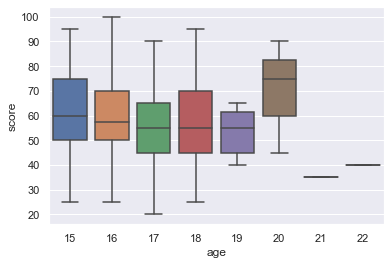

16    96
17    90
15    76
18    69
19    16
20     3
21     1
22     1
Name: age, dtype: int64

In [14]:
sns.boxplot(x='age', y='score', data=data)
plt.show()
display(data['age'].value_counts())

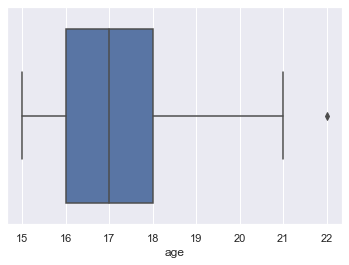

In [15]:
sns.boxplot(x=data['age'])
plt.show()

По баксплоту видно, что 22 года - выброс. 21 год имеет только одно значение. Я принял решение удалить из датасета эти значения.

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

First quantile: 16.0, Third quantile: 18.0, IQR: 2.0,  Outliers: [13.0, 21.0].


16    96
17    90
15    76
18    69
19    16
20     3
Name: age, dtype: int64

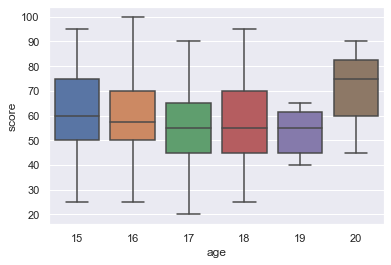

In [16]:
display(data['age'].describe())
age_iqr = perc_iqr(data['age'])

# According to boxplot and IQR delete outliers (desided delete 21 too)
data = data[(data['age'] > age_iqr[0]) & (data['age'] < age_iqr[1])]

display(data['age'].value_counts())

sns.boxplot(x='age', y='score', data=data)
plt.show()

### absences column treatment

Ещё один чисто числовой столбец в нашем датасете. Он показываем количество пропущенных занятий.  Построим его гистограмму распределения и боксплот.

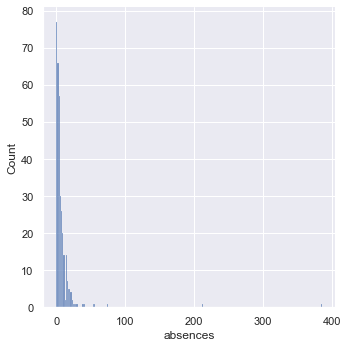

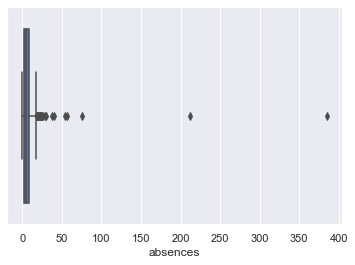

count    340.000000
mean       8.082353
std       24.772100
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  340 non-null    float64
dtypes: float64(1)
memory usage: 13.6 KB


None

First quantile: 2.0, Third quantile: 8.0, IQR: 6.0,  Outliers: [-7.0, 17.0].


In [17]:
# Before
sns.displot(data['absences'])
plt.show()
sns.boxplot(x=data['absences'])
plt.show()

display(data['absences'].describe())
display(pd.DataFrame(data['absences']).info())
absences_iqr = perc_iqr(data['absences'])

<b>Столбец с пропусками занятий имеет выбросы. Я решил их значения сократить до значения 3-ей квартили.

In [18]:
# According to displot and IQR I desided to reduce high outliers to perc75
data['absences'] = data['absences'].apply(lambda x: None if pd.isna(x) else
                                          absences_iqr[3] if x > absences_iqr[1] else x)

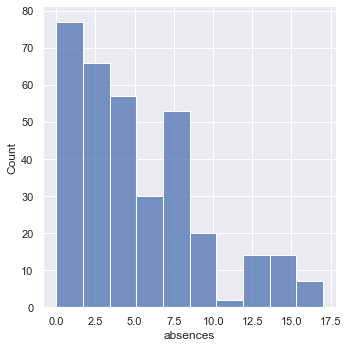

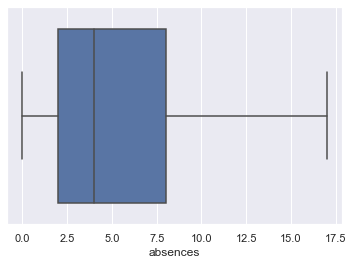

In [19]:
# After
sns.displot(data['absences'])
plt.show()

sns.boxplot(x=data['absences'])
plt.show()

### Checking other columns data for valid values

Проверим оставшиеся столбцы на валидность данных. Они описаны в задании. В начальных установках есть словари с валидными данными для каждого столбца.
Решил не писать отдельную функцию для этого действия, т.к. делаю это только один раз в этом проекте.

In [20]:
for col in data.drop(['age', 'absences', 'score'], axis=1):
    if data[col].dtype != 'object' and col in valid_dict_num:
        data[col] = data[col].apply(lambda x: None if pd.isna(x)
                                    else abs(x) if (x < 0 and valid_dict_num[col][0] <= abs(x) <= valid_dict_num[col][1])
                                    else None if not valid_dict_num[col][0] <= x <= valid_dict_num[col][1]
                                    else x)
    else:
        data[col] = data[col].astype(str).apply(lambda x: None if x.strip() == '' else None if x not in valid_dict_str[col]
                                                else x)

# Plan
## Making 3 different DafaFrames:
### 1. Delete all rows with empty cells
### 2. Delete only rows with empty cells in 'score' columns (NaN and 0)
### 3. Filling NAN cells with mode or some another data
## Work with every DF
## Select the best

## DataFrame 1 (without empty cells - deleting all raws)

Тут всё просто. Удаляю все строки в которых есть хотя бы одно пустое значение

In [21]:
df1 = data.dropna()

## DataFrame 2 (With empty cell but Score columns)

Второй датасет является копией оригинального датасета

In [22]:
df2 = data.copy()

Хочу попробовать перевести все колонки с двумя категориями в числовую форму и посмотреть на корреляцию.

In [23]:
temp = df2.copy()
for col in temp.drop(['age', 'absences', 'score'], axis=1):
    if temp[col].dtype == 'object' and len(valid_dict_str[col]) == 2:
        temp[col] = temp[col].apply(lambda x: 0 if x == valid_dict_str[col][0] else 1 if x == valid_dict_str[col][1] else None)
temp

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,0,18,0.0,NaN,0.0,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,4.0,3.0,4.0,3.0,6.0,30.0
1,0,0,17,0.0,0.0,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,3.0,3.0,3.0,4.0,30.0
2,0,0,15,0.0,1.0,1.0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,0,0,15,0.0,0.0,1.0,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,0,0,16,0.0,0.0,1.0,3.0,3.0,other,other,home,father,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,18,0.0,1.0,1.0,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,4.0,1.0,0.0,40.0
347,1,1,20,0.0,1.0,0.0,2.0,2.0,services,services,course,None,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,5.0,4.0,4.0,8.0,45.0
348,1,1,17,0.0,1.0,1.0,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,4.0,5.0,2.0,3.0,80.0
350,1,1,18,1.0,1.0,1.0,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,4.0,4.0,1.0,5.0,0.0,50.0


### DataFrame 3 (With empty cell filled by mode (or something else))

В третьем датафрейме я заменяю значения на:
1. Столбцы medu и fedu имеют очень заметную корреляцию (> 0.6). В связи с этим я принял решение заполнить недостающие данные одного столбца данными из другого и наоборот.
2. Пустые ячейки столбцов с данными типа 'object' я заменяю модой.
3. Пустые ячейки цифровых категориальных столбцов я заменяю медианным значением (с отбрасыванием дробной части)

In [24]:
df3 = data.copy()
df3['medu'] = df3[['medu', 'fedu']].apply(lambda x: x[1] if pd.isna(x[0]) else x[0], axis=1)
df3['fedu'] = df3[['medu', 'fedu']].apply(lambda x: x[0] if pd.isna(x[1]) else x[1], axis=1)
for col in df3.drop(['age', 'absences', 'score'], axis=1):
    if df3[col].dtype == 'object':
        df3[col] = df3[col].apply(lambda x: df3[col].mode()[0] if pd.isna(x) else x)
    else:
        df3[col] = df3[col].apply(lambda x: int(df3[col].median()) if pd.isna(x) else x)
display(df3.head(10))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


### Let's make correlation tables

Построим корреляционные таблицы по получившимся датасетам

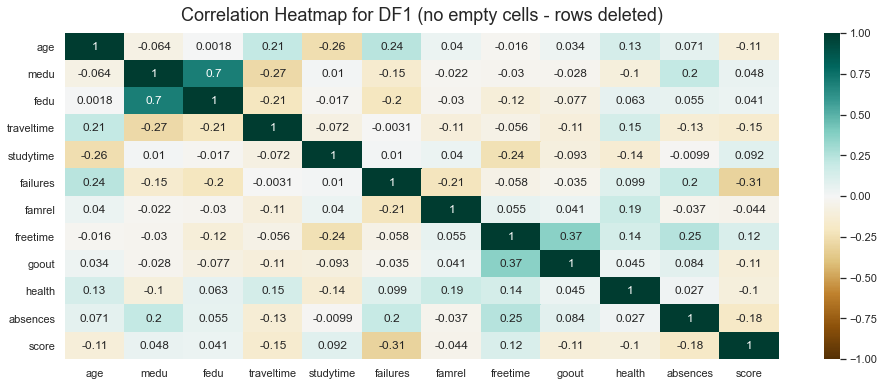

In [25]:
get_corr_heatmap(df1, 'Correlation Heatmap for DF1 (no empty cells - rows deleted)')

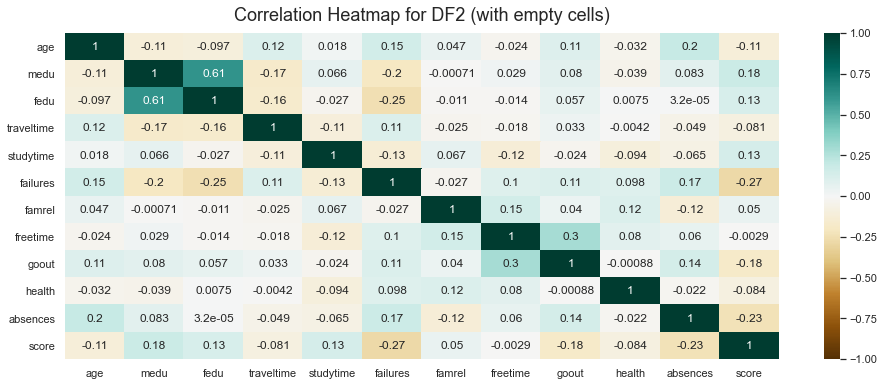

In [37]:
get_corr_heatmap(df2, 'Correlation Heatmap for DF2 (with empty cells)')

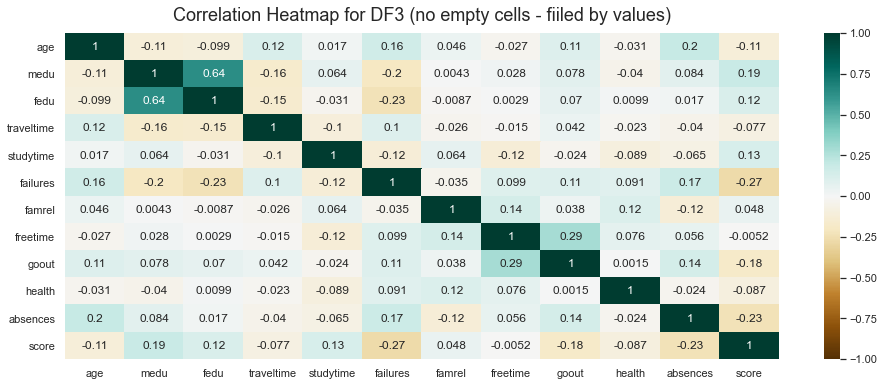

In [39]:
get_corr_heatmap(df3, 'Correlation Heatmap for DF3 (no empty cells - fiiled by values)')

Корреляционная таблица по датафрейму с оцифрованными категориальными столбцами я сделал для теста.
<br><b>Хочу потом получить комментарий у ментора, что можно сделать с такими данными и можно ли.

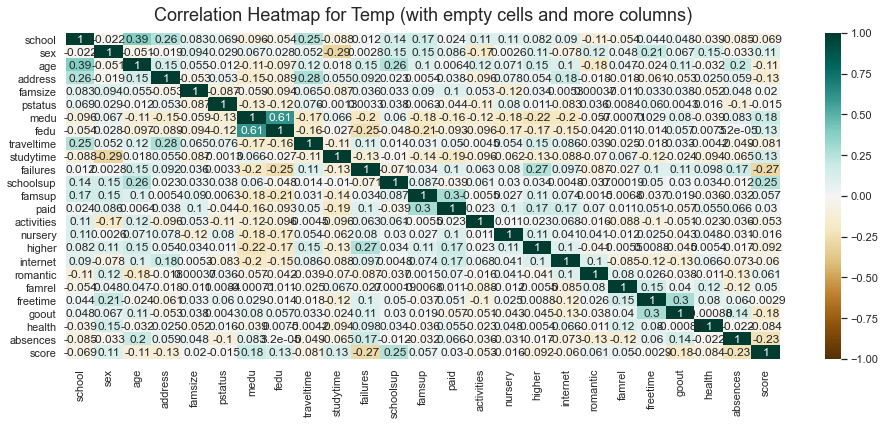

In [40]:
get_corr_heatmap(temp, 'Correlation Heatmap for Temp (with empty cells and more columns)')

### Сonclusions for correlations

Итак, корреляция по столбцам: age, absences к score:
По всем 3-м дата фреймам наблюдается слабая отрицательная корреляция. Что касается коррреляции между age и absences то она слабо положительная. Все числовые столбцы я возьму дальше для моделирования.<br>Также есть несколько псевдочисловых столбцов (они категориальные). Но по ним также можно посмотреть корреляцию. Видна сильная корреляция между medu и fedu - > 0.6 по всем вариантам датафреймов. По ним я сделал для третьего датафрейма заполнение пустых значений. Остальные корреляции от совсех слабых до слабых. Дальше будем смотреть по боксплотам и тестам.

### Boxplots for category columns

Сделаем визуальный анализ по категориальным столбцам.
Для лучшей читаемости я сделал копии датафреймов и заменил числовые значения категорий на их описательные значения.<br><i>Хотелось бы получить обратную связь можно би это было сделать без создания копий датафреймов и изменения оригинальный датафреймов.

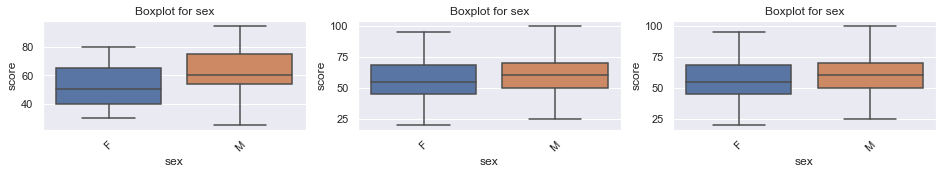

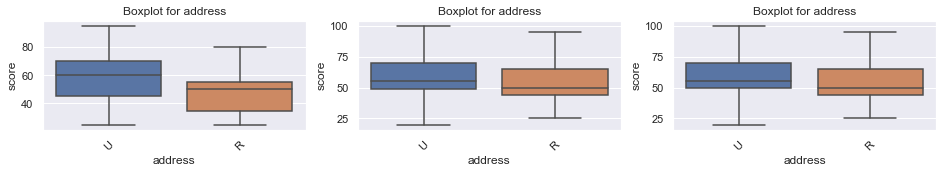

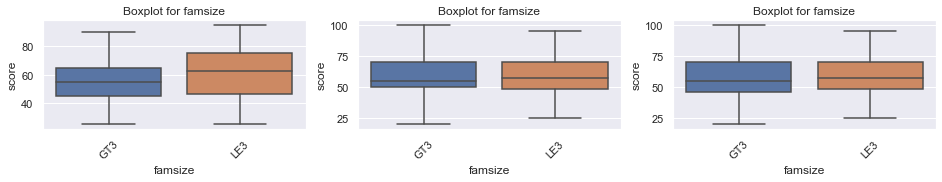

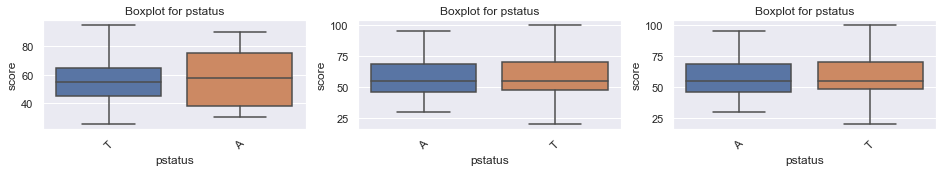

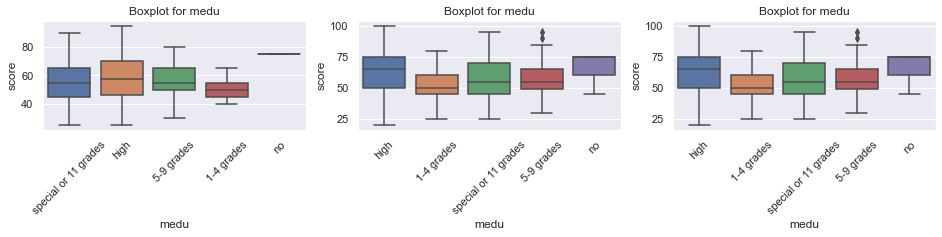

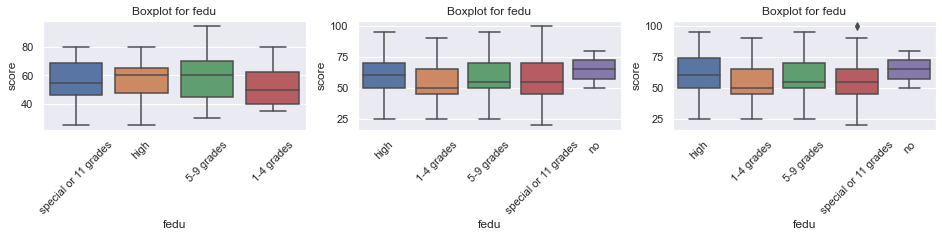

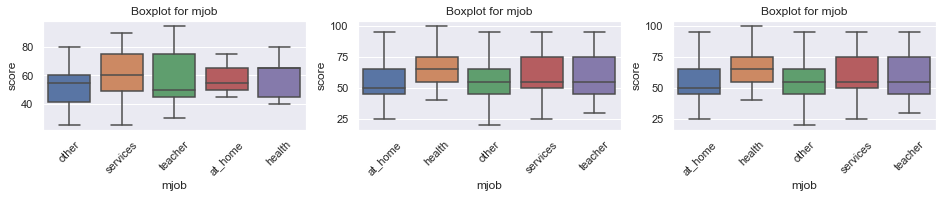

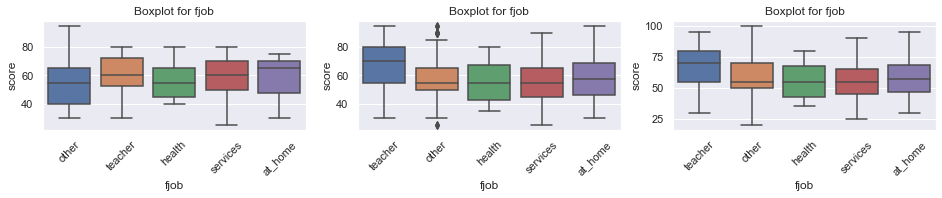

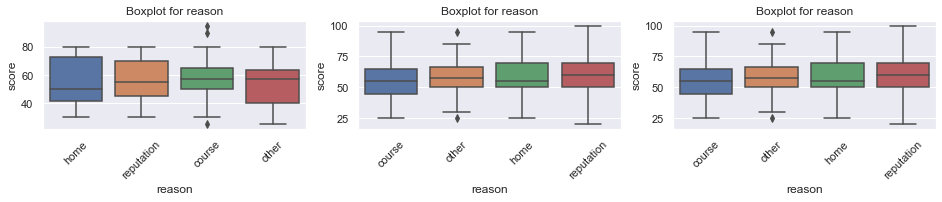

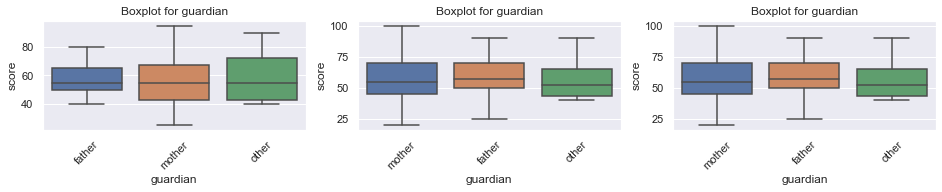

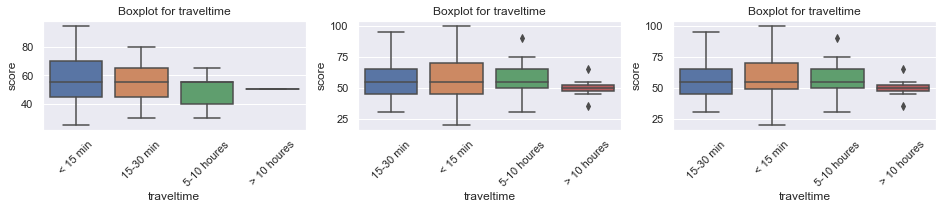

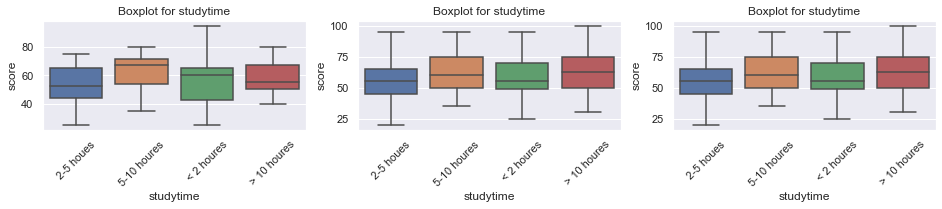

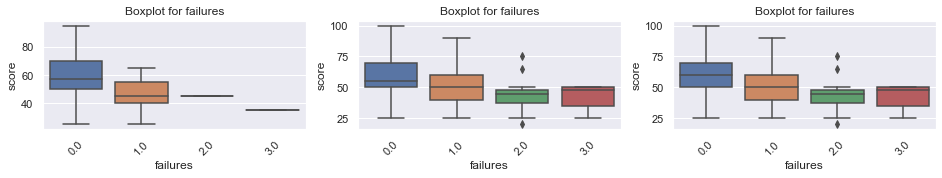

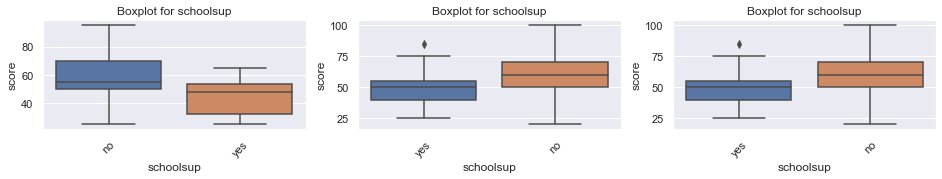

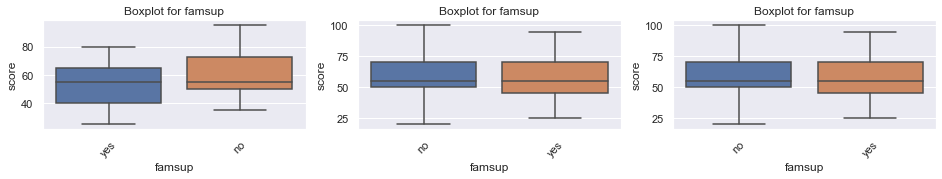

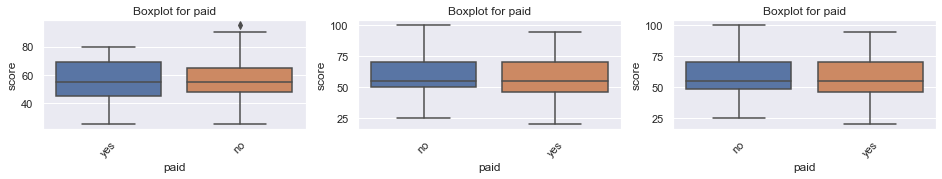

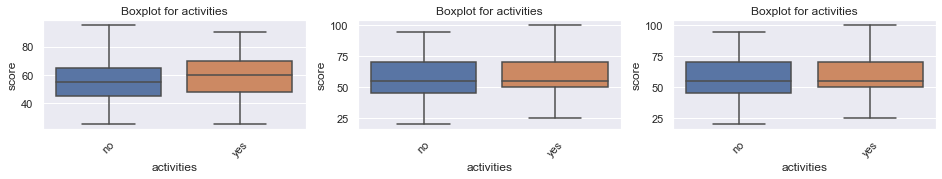

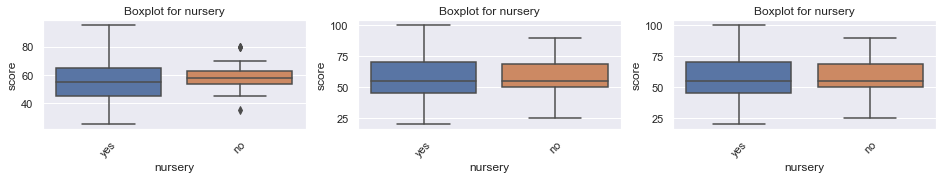

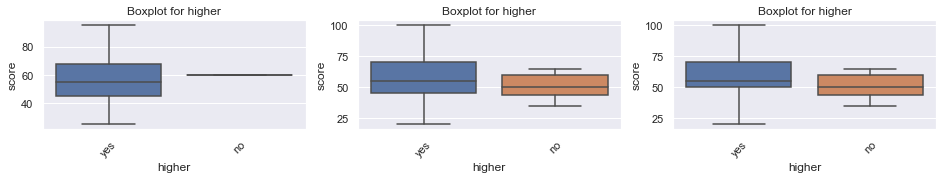

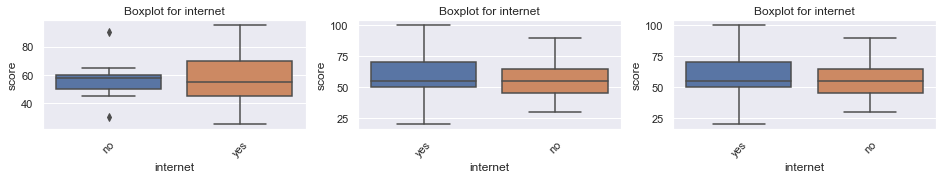

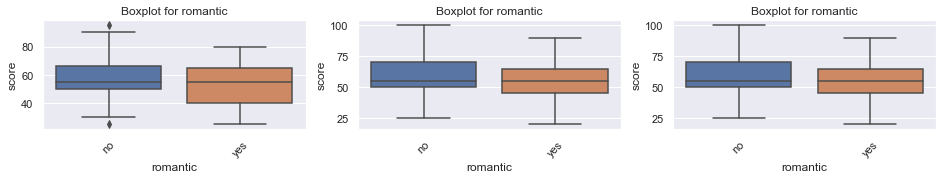

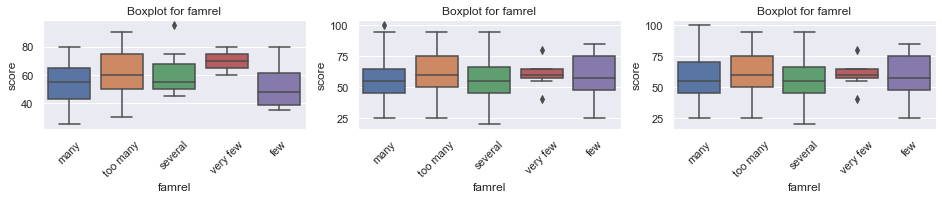

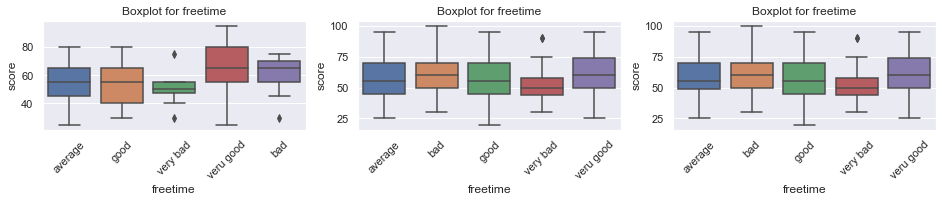

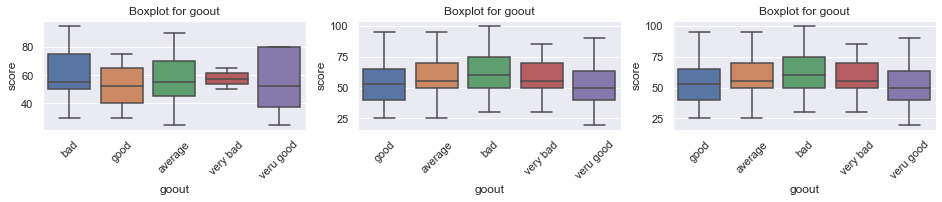

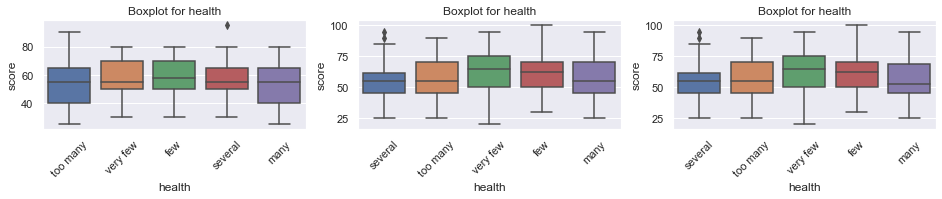

In [29]:
df1_tobox, df2_tobox, df3_tobox = df1.copy(), df2.copy(), df3.copy()
for col in num_to_str_dict:
    df1_tobox[col] = df1_tobox[col].apply(lambda y: None if pd.isna(y) else num_to_str_dict[col][y])
    df2_tobox[col] = df2_tobox[col].apply(lambda y: None if pd.isna(y) else num_to_str_dict[col][y])
    df3_tobox[col] = df3_tobox[col].apply(lambda y: None if pd.isna(y) else num_to_str_dict[col][y])
for col in cat_list:    
    get_boxplot(col, df1_tobox, df2_tobox, df3_tobox)

### Сonclusions for boxlpots

Из ряда боксплотов я бы выделил для дальнейшего моделирования следующие:
sex, famsize, medu, mjob, fjob, failures, schoolsup, goout, health.
Посмотрим на дальнейший статистический анализ. <br><b>Проверим нулевую гипотезу, что распределение оценок по категориям не неразличимы.

### Making Ttest and ANOVA test for all dataframe

<b>Результаты для DF1

In [30]:
get_stat_dif(cat_list, df1)

Найдены статистически значимые различия Ttest для колонки sex
Найдены статистически значимые различия Ttest для колонки address
Not enough samples for pstatus
Not enough samples for guardian
Not enough samples for failures
Not enough samples for schoolsup
Найдены статистически значимые различия Ttest для колонки famsup
Not enough samples for nursery
Not enough samples for higher
Not enough samples for internet
Not enough samples for health


In [31]:
get_stat_anova(cat_list, df1)

Найдены статистически значимые различия ANOVA для колонки sex
Найдены статистически значимые различия ANOVA для колонки address
Not enough samples for pstatus
Not enough samples for guardian
Not enough samples for failures
Not enough samples for schoolsup
Найдены статистически значимые различия ANOVA для колонки famsup
Not enough samples for nursery
Not enough samples for higher
Not enough samples for internet
Not enough samples for health


<b>Результаты для DF2

In [32]:
get_stat_dif(cat_list, df2)

Найдены статистически значимые различия Ttest для колонки sex
Найдены статистически значимые различия Ttest для колонки address
Найдены статистически значимые различия Ttest для колонки medu
Найдены статистически значимые различия Ttest для колонки fedu
Найдены статистически значимые различия Ttest для колонки mjob
Найдены статистически значимые различия Ttest для колонки fjob
Найдены статистически значимые различия Ttest для колонки studytime
Найдены статистически значимые различия Ttest для колонки failures
Найдены статистически значимые различия Ttest для колонки schoolsup
Not enough samples for higher
Найдены статистически значимые различия Ttest для колонки goout


In [33]:
get_stat_anova(cat_list, df2)

Найдены статистически значимые различия ANOVA для колонки sex
Найдены статистически значимые различия ANOVA для колонки address
Найдены статистически значимые различия ANOVA для колонки medu
Найдены статистически значимые различия ANOVA для колонки mjob
Найдены статистически значимые различия ANOVA для колонки fjob
Найдены статистически значимые различия ANOVA для колонки studytime
Найдены статистически значимые различия ANOVA для колонки failures
Найдены статистически значимые различия ANOVA для колонки schoolsup
Not enough samples for higher
Найдены статистически значимые различия ANOVA для колонки goout


<b>Результаты для DF3

In [34]:
get_stat_dif(cat_list, df3)

Найдены статистически значимые различия Ttest для колонки sex
Найдены статистически значимые различия Ttest для колонки address
Найдены статистически значимые различия Ttest для колонки medu
Найдены статистически значимые различия Ttest для колонки fedu
Найдены статистически значимые различия Ttest для колонки mjob
Найдены статистически значимые различия Ttest для колонки fjob
Найдены статистически значимые различия Ttest для колонки studytime
Найдены статистически значимые различия Ttest для колонки failures
Найдены статистически значимые различия Ttest для колонки schoolsup
Not enough samples for higher
Найдены статистически значимые различия Ttest для колонки goout


In [35]:
get_stat_anova(cat_list, df3)

Найдены статистически значимые различия ANOVA для колонки sex
Найдены статистически значимые различия ANOVA для колонки address
Найдены статистически значимые различия ANOVA для колонки medu
Найдены статистически значимые различия ANOVA для колонки fedu
Найдены статистически значимые различия ANOVA для колонки mjob
Найдены статистически значимые различия ANOVA для колонки fjob
Найдены статистически значимые различия ANOVA для колонки studytime
Найдены статистически значимые различия ANOVA для колонки failures
Найдены статистически значимые различия ANOVA для колонки schoolsup
Not enough samples for higher
Найдены статистически значимые различия ANOVA для колонки goout


### Сonclusions for statistic tests

Для первого датасета для дальнейшего моделирования есть 3 столбца.
Посмотрим, что для остальных двух:
Там данных больше и по ним есть более крупные выборки. И второй и третий датасеты дают похожий результат. Только одно отличие - ANOVA тест не дает отличий в fedu. В то время как Ttest этот столбец выдал в своем результате. В принципе, мои выводы по боксплотам совпали со статистическими тестами.
<br>В конечный датасет для моделирования я возьму следующие столбцы: <b>sex, address, medu, mjob, fjob, studytime, failures, schoolsup, goout


Для финального датафрейма я решил выбрать второй датафрейм (без заполнения пустых ячеек), так как по боксплотам и статистическим тестам они дают очень похожие результаты и для дальнейшего анализа лучше взять не заполненый непроверенными данными датафрейм. <br>В финальный датафрейм я решил взять следующие столбцы:<b>age, score, absences, sex, address, medu, mjob, fjob, studytime, failures, schoolsup, goout

In [36]:
model_df = df2[['age', 'sex', 'address', 'medu', 'mjob', 'fjob',
                'studytime', 'failures', 'schoolsup', 'goout', 'absences', 'score']]
display(model_df)

,age,sex,address,medu,mjob,fjob,studytime,failures,schoolsup,goout,absences,score
0,18,F,U,4.0,at_home,teacher,2.0,0.0,yes,4.0,6.0,30.0
1,17,F,U,1.0,at_home,other,2.0,0.0,no,3.0,4.0,30.0
2,15,F,U,1.0,at_home,other,2.0,3.0,yes,2.0,10.0,50.0
3,15,F,U,4.0,health,None,3.0,0.0,no,2.0,2.0,75.0
4,16,F,U,3.0,other,other,2.0,0.0,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
346,18,F,U,3.0,teacher,services,2.0,0.0,no,4.0,0.0,40.0
347,20,M,U,2.0,services,services,2.0,2.0,no,4.0,8.0,45.0
348,17,M,U,3.0,services,services,1.0,0.0,no,5.0,3.0,80.0
350,18,M,R,3.0,services,other,1.0,0.0,no,1.0,0.0,50.0


## Сonclusions for EDA project

<ol>
<li>Данные на вход были достаточно чистые. Были разные написания заголовков столбцов. Пропусков по столбцам было не очень много. Числовые столбцы имеют большой процент заполнения. AGE имеет 100 процентов значений. Выбросы были, но их количество не было большим. В каком то случае я удалил их значения в каком то изменил на более приемлемое.</li>
<li>При анализе данных я решил попробовать 3 вида обработки. Убрать строки со всеми пропусками, оставить пропуски как есть и заполнить пропуски данными (модой, медианой). В результате пришёл к выводу, что для дальнейшего использования я возьму второй датафрейм (где оставлены пропуски). Так как корректно заполнить имеющиеся нет возможности.</li>
<li>Так же в ходе исследования я увидел, что некоторые ученики имеют 0 за экзамен. Эти строки я удалил из датафрейма, так как не могу считать их валидными и у меня есть предположение, что это ошибочные данные. Если есть возможность, необходимо усточнить их природу.</li>
<li>Достаточно большая кореляция была только у двух столбцов - medu и fedu. Что, с моей точки зрения, достаточно логично.</li>
<li>Для дальнейшего построения модели, я, на основе стат тестов и боксплотов выбрал следующие параметры: <b>age, score, absences, sex, address, medu, mjob, fjob, studytime, failures, schoolsup, goout</li>